In [1]:
# Importing Liberaries: 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# loading the marketing dataset: 
marketing=pd.read_csv('marketing.csv')
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


# Data Assessing

In [3]:
# Examining data types & null values: 
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [4]:
# Dataset Description:
print(f'- The Marketing Dataset consists of {marketing.shape[0]} Rows and {marketing.shape[1]} Columns')
print (f'\n- The dataset consists of {marketing.user_id.nunique()} user.\n')
print(f'''
- The Data Selection: 
    Start: {marketing.date_served.astype('datetime64[ns]').min().strftime('%Y-%m-%d')} 
    End  : {marketing.date_served.astype('datetime64[ns]').max().strftime('%Y-%m-%d')}\n''')
print(f'''
- The Subscription Dates: 
    Start: {marketing.date_subscribed.astype('datetime64[ns]').min().strftime('%Y-%m-%d')} 
    End  : {marketing.date_subscribed.astype('datetime64[ns]').max().strftime('%Y-%m-%d')}\n''')
print(f'''
- The Subscription Cancellation occured within: 
    Start: {marketing.date_canceled.astype('datetime64[ns]').min().strftime('%Y-%m-%d')} 
    End  : {marketing.date_canceled.astype('datetime64[ns]').max().strftime('%Y-%m-%d')}\n''')
print('- The Marketing Channels are as follows:')
for x, y in enumerate(marketing.marketing_channel.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Variant categories are as follows:')
for x, y in enumerate(marketing.variant.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Converted column is classified into:')
for x, y in enumerate(marketing.converted.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Displayed Languages are as follows:')
for x, y in enumerate(marketing.language_displayed.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Preferred Languages are as follows:')
for x, y in enumerate(marketing.language_preferred.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Age Groups are classified as follows:')
for x, y in enumerate(marketing.age_group.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Subscribing Channels are as follows:')
for x, y in enumerate(marketing.subscribing_channel.unique()): 
    print('  ',x+1, '-', y)
print('\n- The is_retained column is classified into:')
for x, y in enumerate(marketing.is_retained.unique()): 
    print('  ',x+1, '-', y)

- The Marketing Dataset consists of 10037 Rows and 12 Columns

- The dataset consists of 7309 user.


- The Data Selection: 
    Start: 2018-01-01 
    End  : 2018-01-31


- The Subscription Dates: 
    Start: 2018-01-01 
    End  : 2018-01-31


- The Subscription Cancellation occured within: 
    Start: 2018-01-05 
    End  : 2018-05-09

- The Marketing Channels are as follows:
   1 - House Ads
   2 - Push
   3 - Facebook
   4 - Instagram
   5 - Email
   6 - nan

- The Variant categories are as follows:
   1 - personalization
   2 - control

- The Converted column is classified into:
   1 - True
   2 - False
   3 - nan

- The Displayed Languages are as follows:
   1 - English
   2 - German
   3 - Arabic
   4 - Spanish

- The Preferred Languages are as follows:
   1 - English
   2 - German
   3 - Arabic
   4 - Spanish

- The Age Groups are classified as follows:
   1 - 0-18 years
   2 - 19-24 years
   3 - 24-30 years
   4 - 30-36 years
   5 - 36-45 years
   6 - 45-55 years
   7 - 55+ y

In [5]:
# Summary Statistics
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [6]:
# Identifying the Null Values:
if marketing.isna().sum().sum() == 0: 
    print('The Dataset has no NULL Values')
else: 
    print(f'''The Dataset has {marketing.isna().sum().sum()} NULL Values that are distributed as follows: ''')
marketing.isna().sum().reset_index().rename(columns={'index':'Column_Name',0:'NULLs_Count'}).style.hide()

The Dataset has 34049 NULL Values that are distributed as follows: 


Column_Name,NULLs_Count
user_id,0
date_served,16
marketing_channel,15
variant,0
converted,15
language_displayed,0
language_preferred,0
age_group,0
date_subscribed,8181
date_canceled,9460


In [7]:
if marketing.duplicated().sum() == 0: 
    print('The Dataset has no Duplicated Values')
else: 
    print(f'''
The Dataset has {marketing.duplicated().sum()} Duplicated rows and their indexes are as follows:\n 
{", ".join(map(str,marketing[marketing.duplicated()].index.to_list()))}''')


The Dataset has 37 Duplicated rows and their indexes are as follows:
 
470, 478, 894, 895, 954, 955, 1004, 1005, 1027, 1047, 1051, 3022, 3166, 3196, 3198, 3310, 3498, 3642, 3801, 3803, 4083, 4124, 4129, 4134, 6880, 7440, 7488, 8452, 8454, 8456, 8458, 8486, 8488, 8500, 8502, 8504, 8506


# Data Cleaning: 
## 1- Removing Duplicates


In [8]:
marketing.drop_duplicates(inplace=True)
if marketing.duplicated().sum() == 0: 
    print(f'The Dataset has no Duplicated Values with {marketing.shape[0]} Row')
else: 
    print(f'''
The Dataset has {marketing.duplicated().sum()} Duplicated rows and their indexes are as follows:\n 
{", ".join(map(str,marketing[marketing.duplicated()].index.to_list()))}''')

The Dataset has no Duplicated Values with 10000 Row


In [9]:
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10000,9984,9985,10000,9985,10000,10000,10000,1845,575,1845,1845
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/1/18,Instagram,True
freq,12,786,4704,5069,8911,9757,9243,1676,162,14,594,1270


## 2- Changing Data Types
- ***date_served:*** _str_ to _date_
- ***converted:*** _str_ to _boolean_
- ***date_subscribed:*** _str_ to _date_
- ***date_canceled:*** _str_ to _date_
- ***is_retained:*** _str_ to _boolean_

In [10]:
# Changing the data type of date_served: 
marketing['date_served']=pd.to_datetime(marketing['date_served'])
marketing['date_served'].dtype

dtype('<M8[ns]')

In [11]:
# Changing the data type of converted: 
marketing['converted']=marketing.converted.astype('bool')

In [12]:
# Changing the data type of date_subscribed: 
marketing['date_subscribed']=pd.to_datetime(marketing['date_subscribed'])
marketing['date_subscribed'].dtype

dtype('<M8[ns]')

In [13]:
# Changing the data type of date_canceled: 
marketing['date_canceled']=pd.to_datetime(marketing['date_canceled'])
marketing['date_canceled'].dtype

dtype('<M8[ns]')

## 3- Adding New Columns:
- ***is_house_ad:*** Identifies if a particular marketing asset was a house ad or not _(since it is the most frequent value in this column "4733 out of 10000")_
- ***matched_lang:*** conveys whether the ad was shown to the user in their preferred language
- ***dow:*** service Days starting from Monday till Sunday, t measure the most frequent days

In [14]:
# Adding the is_house_ad Column
marketing['is_house_ad']=[
    True if x=="House Ads" 
    else False for x in marketing.marketing_channel]
marketing.loc[:,['marketing_channel','is_house_ad']].sample(5)

,marketing_channel,is_house_ad
8148,Push,False
3247,Push,False
7734,Instagram,False
7342,House Ads,True
6425,Facebook,False


In [15]:
# Adding matched_lang Column 
marketing['matched_lang']=np.where(marketing['language_displayed']==marketing['language_preferred'],True,False)
marketing.loc[:,['language_displayed','language_preferred','matched_lang']].sample(5)

,language_displayed,language_preferred,matched_lang
1110,English,English,True
3326,English,English,True
1665,English,English,True
9658,English,English,True
8428,English,English,True


In [16]:
# Adding dow column: 
marketing['dow']= ['Mo' if x==0
                  else 'Tu' if x== 1
                  else 'We' if x==2
                  else 'Th' if x==3
                  else 'Fr' if x==4
                  else 'Sa' if x==5
                  else 'Su' if x==6
                  else 'NaT'for x in marketing.date_served.dt.dayofweek]
marketing.loc[:,['date_served','dow']].sample(5)


,date_served,dow
110,2018-01-04,Th
3492,2018-01-07,Su
2812,2018-01-13,Sa
2024,2018-01-13,Sa
5194,2018-01-08,Mo


## 3- Mapping values to existing columns
> ***Note:*** _Due to the way pandas stores data, in a large dataset, it can be computationally inefficient to store columns of strings. In such cases, it can speed things up to instead store these values as numbers._

- ***marketing_channel*** will be as follows:
   - _House Ads = 1_
   - _Push = 2_
   - _Facebook = 3_
   - _Instagram = 4_
   - _Email = 5_

In [17]:
# Mapping marketing_channel column:
ch_dict={'House Ads' : 1,'Push' : 2,'Facebook' : 3,'Instagram' : 4,'Email' : 5}
marketing['ch_code']=marketing.marketing_channel.map(ch_dict).astype('Int64')
marketing.loc[:,['marketing_channel','ch_code']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10036
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketing_channel  9985 non-null   object
 1   ch_code            9985 non-null   Int64 
dtypes: Int64(1), object(1)
memory usage: 244.1+ KB


In [18]:
marketing.isna().sum().reset_index().rename(columns={'index':'Column_Name',0:'NULLs_Count'}).style.hide()

Column_Name,NULLs_Count
user_id,0
date_served,16
marketing_channel,15
variant,0
converted,0
language_displayed,0
language_preferred,0
age_group,0
date_subscribed,8155
date_canceled,9425


# Initial Investigation

In [19]:
# Number of daily users :
daily_users = marketing.groupby(['date_served','dow']).user_id.nunique().reset_index()\
                        .rename(columns={'date_served':'Date','user_id':'Num_Users'})

daily_users

,Date,dow,Num_Users
0,2018-01-01,Mo,362
1,2018-01-02,Tu,374
2,2018-01-03,We,348
3,2018-01-04,Th,323
4,2018-01-05,Fr,319
5,2018-01-06,Sa,308
6,2018-01-07,Su,275
7,2018-01-08,Mo,312
8,2018-01-09,Tu,312
9,2018-01-10,We,337


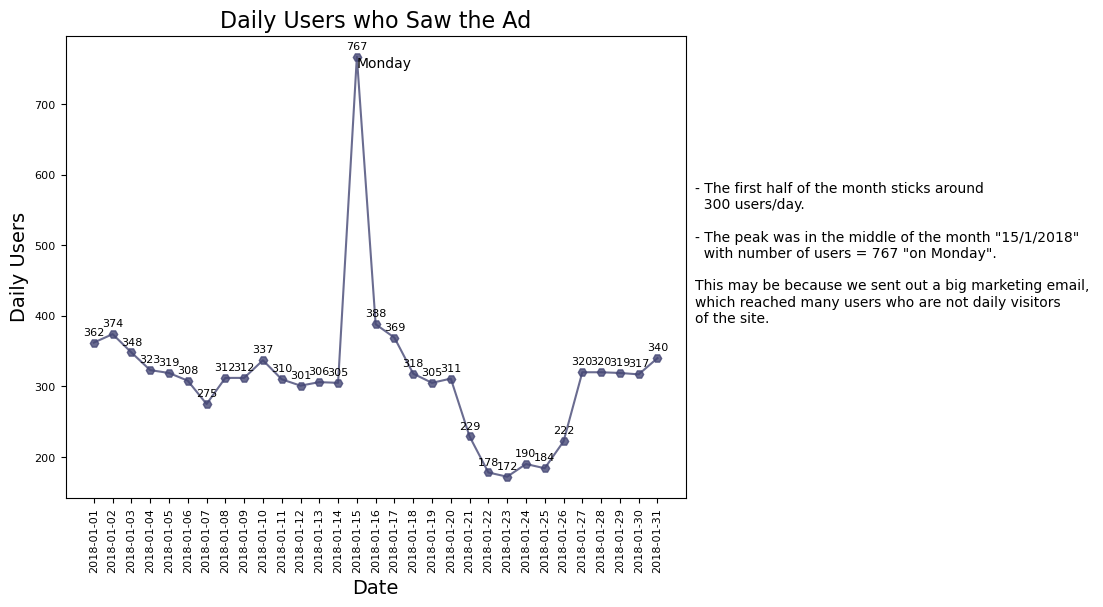

In [20]:
# Visualization: 
x= daily_users.Date.astype('str').to_list()
y= daily_users.Num_Users
text ='''
- The first half of the month sticks around 
  300 users/day.\n
- The peak was in the middle of the month "15/1/2018" 
  with number of users = 767 "on Monday".\n
This may be because we sent out a big marketing email, 
which reached many users who are not daily visitors 
of the site.'''
plt.subplots(figsize = (8,6))
plt.plot(x,y,color='#454775',marker = 'H', alpha=.8)
for i, v in enumerate(y):
  plt.text(i,v+15, f"{v:.0f}", ha='center', va='center',fontsize=8)
plt.title('Daily Users who Saw the Ad',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Daily Users',fontsize=14)
plt.yticks(fontsize=8)
plt.text(32,500,text,va='center',ha='left')
plt.text('2018-01-15', 767, 'Monday',va='top', ha='left');

In [21]:
# Number of weekday users :
weekday_users = marketing.groupby(['dow']).user_id.nunique().reset_index()\
                        .rename(columns={'dow':'Day','user_id':'Num_Users'}).sort_values('Num_Users', ascending=False)

weekday_users

,Day,Num_Users
1,Mo,1861
7,We,1527
6,Tu,1517
3,Sa,1225
0,Fr,1129
5,Th,1114
4,Su,1109
2,NaT,16


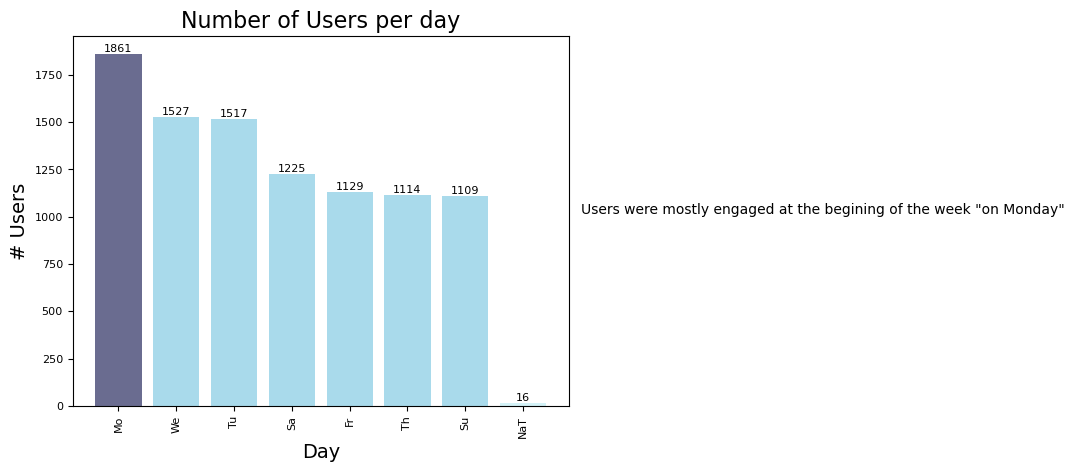

In [22]:
# Visualization:
x= weekday_users.Day.to_list()
y=weekday_users.Num_Users
text = ''' 
Users were mostly engaged at the begining of the week "on Monday"'''
#plt.subplot(figsize=(8,8))
plt.bar(x,y, color=['#454775','#94D1E7','#94D1E7','#94D1E7','#94D1E7','#94D1E7','#94D1E7','#C9EFF5'], alpha=.8)
for i, v in enumerate(y):
  plt.text(i,v+.003, f"{v:.0f}", ha='center', va='bottom',fontsize=8)
plt.title('Number of Users per day',fontsize=16)
plt.xlabel('Day',fontsize=14)
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('# Users',fontsize=14)
plt.yticks(fontsize=8)
plt.text(8,1000,text,va='bottom',ha='left');

In [138]:
# Number of users for each marketing channel:
ch_users=marketing.groupby('marketing_channel').user_id.count().reset_index().rename(columns={'user_id':"num_users"})\
                  .sort_values('num_users')
ch_users['pct']=ch_users.num_users/ch_users.num_users.sum()
ch_users.style.format({'pct':'{:.2%}'})

,marketing_channel,num_users,pct
0,Email,563,5.64%
4,Push,991,9.92%
1,Facebook,1859,18.62%
3,Instagram,1868,18.71%
2,House Ads,4704,47.11%


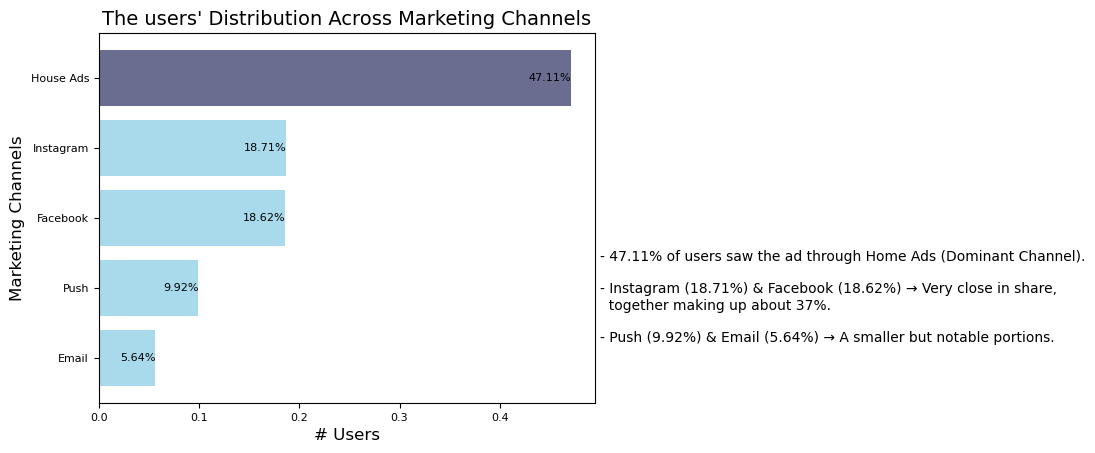

In [149]:
# Visualization: 
x= ch_users.marketing_channel.to_list()
y= ch_users.pct
text='''
- 47.11% of users saw the ad through Home Ads (Dominant Channel).\n
- Instagram (18.71%) & Facebook (18.62%) → Very close in share, 
  together making up about 37%.\n
- Push (9.92%) & Email (5.64%) → A smaller but notable portions.
'''
plt.barh(x,y, color=['#94D1E7','#94D1E7','#94D1E7','#94D1E7','#454775'], alpha=.8)
plt.title("The users' Distribution Across Marketing Channels", fontsize=14)
plt.xlabel('# Users', fontsize=12)
plt.xticks(fontsize=8)
plt.ylabel('Marketing Channels', fontsize=12)
plt.yticks(fontsize=8)
for i, v in enumerate(y):
    plt.text(v,i,f'{v:.2%}',ha='right', va='center', fontsize=8)
plt.text(.5,0,text);

In [79]:
# Number of users according to variant categories 
var_users = marketing.groupby('variant')['user_id'].count().reset_index()\
                     .rename(columns={'user_id':"num_users",})
var_users['pct']=(var_users.num_users/var_users.num_users.sum())
var_users.style.format({'pct':'{:,.2%}'})

,variant,num_users,pct
0,control,5069,50.69%
1,personalization,4931,49.31%


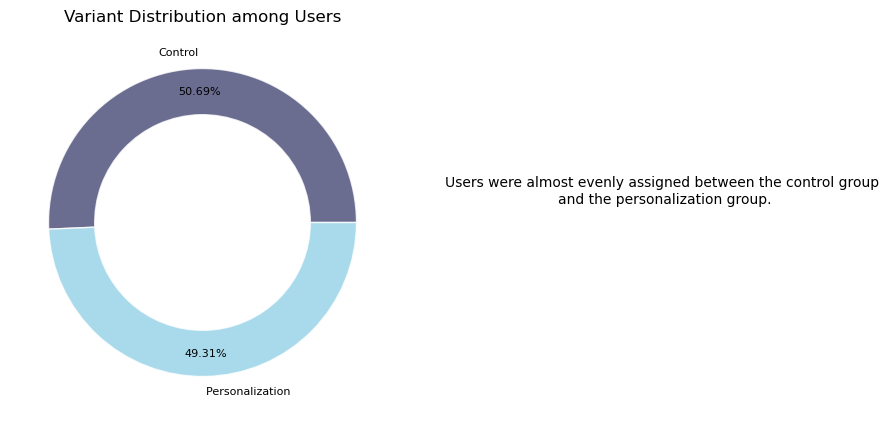

In [151]:
# Visualization: 
size = 0.3
label_var = 'Control','Personalization '
text = ''' 
Users were almost evenly assigned between the control group 
and the personalization group.
    '''
plt.subplots(figsize = (5,5))
wedges, texts, autotexts=plt.pie(var_users.pct, radius=1, colors= ['#454775','#94D1E7'],labels = label_var,autopct='%1.2f%%',
        pctdistance=.85,textprops={'fontsize': 8}, wedgeprops=dict(width=size, edgecolor='w'))

for w in wedges:
    w.set_alpha(0.8) 
    
plt.title('Variant Distribution among Users')
plt.text(3,0,text,ha='center',va='bottom',fontsize = 10, weight = 'normal');


In [98]:
# Number of converted users vs. non-converted users
converted_users = marketing.groupby('converted')['user_id'].count().reset_index()\
                     .rename(columns={'user_id':"num_users",})
converted_users['pct']=(converted_users.num_users/converted_users.num_users.sum())
converted_users.style.format({'pct':'{:,.2%}'})

,converted,num_users,pct
0,False,8911,89.11%
1,True,1089,10.89%


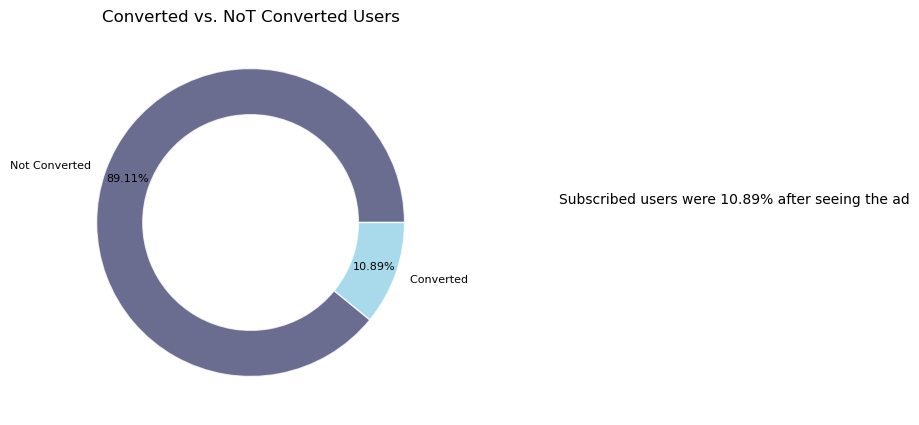

In [100]:
# Visualization: 
size = 0.3
label_con = 'Not Converted','Converted '
text = ''' 
Subscribed users were 10.89% after seeing the ad
    '''
plt.subplots(figsize = (5,5))
wedges, texts, autotexts=plt.pie(converted_users.pct, radius=1, colors= ['#454775','#94D1E7'],labels = label_con,autopct='%1.2f%%',
        pctdistance=.85,textprops={'fontsize': 8}, wedgeprops=dict(width=size, edgecolor='w'))

for w in wedges:
    w.set_alpha(0.8) 
    
plt.title('Converted vs. NoT Converted Users')
plt.text(2,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

In [23]:
marketing.head(1)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ad,matched_lang,dow,ch_code
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,True,Mo,1


In [108]:
lang_displayed=marketing.groupby('language_displayed')['user_id'].count().reset_index()\
              .rename(columns={'language_displayed':'Language','user_id':'Displayed'})
lang_preferred=marketing.groupby('language_preferred')['user_id'].count().reset_index()\
              .rename(columns={'language_preferred':'Language','user_id':'Preferred'})
lang=lang_displayed.merge(lang_preferred,on='Language').sort_values('Displayed')
lang

,Language,Displayed,Preferred
0,Arabic,27,145
2,German,81,166
3,Spanish,135,446
1,English,9757,9243


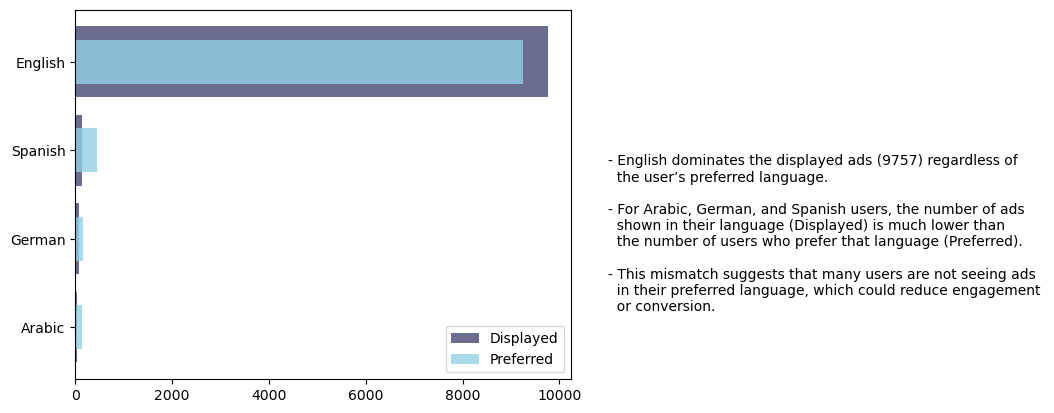

In [135]:
x=lang.Language.to_list()
y=lang.Displayed
z=lang.Preferred
text='''
- English dominates the displayed ads (9757) regardless of 
  the user’s preferred language.\n
- For Arabic, German, and Spanish users, the number of ads 
  shown in their language (Displayed) is much lower than 
  the number of users who prefer that language (Preferred).\n
- This mismatch suggests that many users are not seeing ads 
  in their preferred language, which could reduce engagement 
  or conversion.
'''
bin_size=.5
plt.barh(x,y, label='Displayed',color='#454775',alpha=.8)
plt.barh(x,z,bin_size,label='Preferred', color='#94D1E7',alpha=.8)
plt.legend()
plt.text(11000,0,text);